In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, f1_score, precision_score, recall_score
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
train_path = r"C:\Users\Ramanathan\Desktop\Capstone_4\GUIDE_Train.csv"
test_path = r"C:\Users\Ramanathan\Desktop\Capstone_4\GUIDE_Test.csv"
train_df = pd.read_csv(train_path)
test_df = pd.read_csv(test_path)

# Check the first few rows
train_df.head()

C:\Users\Ramanathan\AppData\Local\Temp\ipykernel_3708\370415337.py:4: DtypeWarning: Columns (10,11) have mixed types. Specify dtype option on import or set low_memory=False.
  test_df = pd.read_csv(test_path)


,Id,OrgId,IncidentId,AlertId,Timestamp,DetectorId,AlertTitle,Category,MitreTechniques,IncidentGrade,...,ResourceType,Roles,OSFamily,OSVersion,AntispamDirection,SuspicionLevel,LastVerdict,CountryCode,State,City
0,180388628218,0,612,123247,2024-06-04T06:05:15.000Z,7,6,InitialAccess,NaN,TruePositive,...,NaN,NaN,5,66,NaN,NaN,NaN,31,6,3
1,455266534868,88,326,210035,2024-06-14T03:01:25.000Z,58,43,Exfiltration,NaN,FalsePositive,...,NaN,NaN,5,66,NaN,NaN,NaN,242,1445,10630
2,1056561957389,809,58352,712507,2024-06-13T04:52:55.000Z,423,298,InitialAccess,T1189,FalsePositive,...,NaN,NaN,5,66,NaN,Suspicious,Suspicious,242,1445,10630
3,1279900258736,92,32992,774301,2024-06-10T16:39:36.000Z,2,2,CommandAndControl,NaN,BenignPositive,...,NaN,NaN,5,66,NaN,Suspicious,Suspicious,242,1445,10630
4,214748368522,148,4359,188041,2024-06-15T01:08:07.000Z,9,74,Execution,NaN,TruePositive,...,NaN,NaN,5,66,NaN,NaN,NaN,242,1445,10630


Missing values in Train dataset:
 MitreTechniques      5468386
IncidentGrade          51340
ActionGrouped        9460773
ActionGranular       9460773
EmailClusterId       9420025
ThreatFamily         9441956
ResourceType         9509762
Roles                9298686
AntispamDirection    9339535
SuspicionLevel       8072708
LastVerdict          7282572
dtype: int64

Missing values in Test dataset:
 MitreTechniques      2307104
ActionGrouped        4146079
ActionGranular       4146079
EmailClusterId       4106285
ThreatFamily         4116614
ResourceType         4144998
Roles                4039317
AntispamDirection    4071481
SuspicionLevel       3498157
LastVerdict          3155260
dtype: int64


C:\Users\Ramanathan\AppData\Local\Temp\ipykernel_3708\1251916731.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='IncidentGrade', data=train_df, palette='viridis')


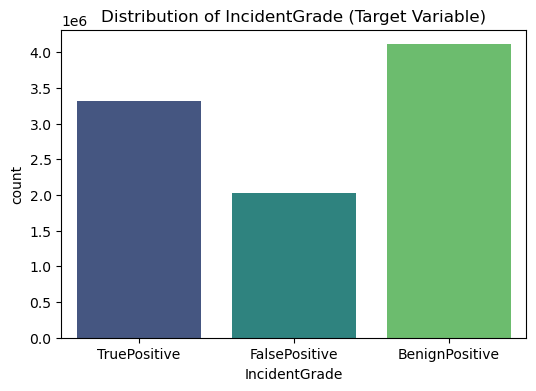

,Id,OrgId,IncidentId,AlertId,DetectorId,AlertTitle,DeviceId,Sha256,IpAddress,Url,...,ApplicationName,OAuthApplicationId,FileName,FolderPath,ResourceIdName,OSFamily,OSVersion,CountryCode,State,City
count,9.516837e+06,9.516837e+06,9.516837e+06,9.516837e+06,9.516837e+06,9.516837e+06,9.516837e+06,9.516837e+06,9.516837e+06,9.516837e+06,...,9.516837e+06,9.516837e+06,9.516837e+06,9.516837e+06,9.516837e+06,9.516837e+06,9.516837e+06,9.516837e+06,9.516837e+06,9.516837e+06
mean,8.425494e+11,1.815800e+02,7.066349e+04,4.065188e+05,1.106724e+02,2.947315e+03,9.566476e+04,1.287191e+05,2.857506e+05,1.503317e+05,...,3.342790e+03,8.807955e+02,2.622621e+05,1.076172e+05,3.583477e+03,4.898537e+00,6.465558e+01,2.236742e+02,1.351488e+03,9.936183e+03
std,4.962499e+11,3.867784e+02,1.208369e+05,4.592827e+05,4.351038e+02,1.146150e+04,1.635288e+04,3.399208e+04,1.412240e+05,3.750795e+04,...,5.103381e+02,1.291083e+01,8.152956e+04,3.220835e+04,9.020262e+01,7.035099e-01,9.314929e+00,6.279729e+01,3.509808e+02,2.606812e+03
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,4.123169e+11,1.000000e+01,5.040000e+02,2.324200e+04,2.000000e+00,2.000000e+00,9.879900e+04,1.382680e+05,3.606060e+05,1.603960e+05,...,3.421000e+03,8.810000e+02,2.895730e+05,1.176680e+05,3.586000e+03,5.000000e+00,6.600000e+01,2.420000e+02,1.445000e+03,1.063000e+04
50%,8.418136e+11,4.500000e+01,1.033600e+04,2.166520e+05,9.000000e+00,1.100000e+01,9.879900e+04,1.382680e+05,3.606060e+05,1.603960e+05,...,3.421000e+03,8.810000e+02,2.895730e+05,1.176680e+05,3.586000e+03,5.000000e+00,6.600000e+01,2.420000e+02,1.445000e+03,1.063000e+04
75%,1.271310e+12,1.710000e+02,8.432900e+04,6.715770e+05,4.500000e+01,1.800000e+02,9.879900e+04,1.382680e+05,3.606060e+05,1.603960e+05,...,3.421000e+03,8.810000e+02,2.895730e+05,1.176680e+05,3.586000e+03,5.000000e+00,6.600000e+01,2.420000e+02,1.445000e+03,1.063000e+04
max,1.709397e+12,6.147000e+03,5.997060e+05,1.721456e+06,9.522000e+03,1.131740e+05,9.879900e+04,1.382680e+05,3.606060e+05,1.603960e+05,...,3.421000e+03,8.810000e+02,2.895730e+05,1.176680e+05,3.586000e+03,5.000000e+00,6.600000e+01,2.420000e+02,1.445000e+03,1.063000e+04


In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Check for missing values in train and test datasets
missing_train = train_df.isnull().sum()
missing_test = test_df.isnull().sum()

# Display columns with missing values
print("Missing values in Train dataset:\n", missing_train[missing_train > 0])
print("\nMissing values in Test dataset:\n", missing_test[missing_test > 0])

# Check the distribution of the target variable 'IncidentGrade' in train dataset
plt.figure(figsize=(6, 4))
sns.countplot(x='IncidentGrade', data=train_df, palette='viridis')
plt.title('Distribution of IncidentGrade (Target Variable)')
plt.show()

# Statistical summary of numerical features
train_df.describe()


In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer

# Handle missing values (example: using mean for numerical and most frequent for categorical)
imputer_num = SimpleImputer(strategy='mean')
imputer_cat = SimpleImputer(strategy='most_frequent')

# Assuming categorical columns are of 'object' type and numerical columns are of other types
cat_cols = train_df.select_dtypes(include=['object']).columns
num_cols = train_df.select_dtypes(exclude=['object']).columns

# Apply imputation
train_df[num_cols] = imputer_num.fit_transform(train_df[num_cols])
train_df[cat_cols] = imputer_cat.fit_transform(train_df[cat_cols])

# Encode categorical variables (example: using Label Encoding)
label_encoder = LabelEncoder()
for col in cat_cols:
    train_df[col] = label_encoder.fit_transform(train_df[col])

# Scale numerical features using StandardScaler
scaler = StandardScaler()
train_df[num_cols] = scaler.fit_transform(train_df[num_cols])

# Splitting the training data into train and validation sets (80-20 split with stratification)
X = train_df.drop('IncidentGrade', axis=1)
y = train_df['IncidentGrade']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)


In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, f1_score, precision_score, recall_score

# Train a baseline Logistic Regression model
baseline_model = LogisticRegression(random_state=42)
baseline_model.fit(X_train, y_train)

# Make predictions on the validation set
y_pred = baseline_model.predict(X_val)

# Evaluate the model
print("Classification Report for Baseline Model:\n")
print(classification_report(y_val, y_pred))

# Macro-F1 Score, Precision, and Recall
f1 = f1_score(y_val, y_pred, average='macro')
precision = precision_score(y_val, y_pred, average='macro')
recall = recall_score(y_val, y_pred, average='macro')

print(f"Macro-F1 Score: {f1:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")


c:\Users\Ramanathan\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Classification Report for Baseline Model:

              precision    recall  f1-score   support

           0       0.45      0.89      0.60    832432
           1       0.54      0.00      0.01    406393
           2       0.38      0.14      0.20    664543

    accuracy                           0.44   1903368
   macro avg       0.46      0.34      0.27   1903368
weighted avg       0.45      0.44      0.33   1903368

Macro-F1 Score: 0.2690
Precision: 0.4578
Recall: 0.3445


In [6]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

# Train Random Forest Classifier with limited estimators and depth to speed up
rf_model = RandomForestClassifier(n_estimators=50, max_depth=10, random_state=42)
rf_model.fit(X_train, y_train)

# Predictions
rf_pred = rf_model.predict(X_val)

# Evaluate Random Forest model
print("Classification Report for Random Forest Model (Faster Training):\n")
print(classification_report(y_val, rf_pred))

# Hyperparameter tuning for Random Forest using GridSearchCV (with fewer options)
param_grid_rf = {
    'n_estimators': [50, 100],  # Reduce the number of estimators
    'max_depth': [5, 10],       # Reduce max_depth to simplify
    'min_samples_split': [2],   # Single value to avoid extra tuning overhead
}

# Use fewer cross-validation folds (cv=2) to speed up grid search
grid_search_rf = GridSearchCV(estimator=rf_model, param_grid=param_grid_rf, scoring='f1_macro', cv=2, n_jobs=-1)
grid_search_rf.fit(X_train, y_train)

# Best parameters and score
print("Best parameters for Random Forest:", grid_search_rf.best_params_)
print("Best Macro-F1 Score from Grid Search:", grid_search_rf.best_score_)


Classification Report for Random Forest Model (Faster Training):

              precision    recall  f1-score   support

           0       0.66      0.98      0.79    832432
           1       0.94      0.49      0.65    406393
           2       0.96      0.66      0.79    664543

    accuracy                           0.76   1903368
   macro avg       0.85      0.71      0.74   1903368
weighted avg       0.82      0.76      0.76   1903368

Best parameters for Random Forest: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 50}
Best Macro-F1 Score from Grid Search: 0.7434532622200317


In [7]:
# Debug: Check best parameters
best_params = grid_search_rf.best_params_
print("Best Parameters from Grid Search:", best_params)

# Create a new model with the best parameters
optimized_rf_model = RandomForestClassifier(
    n_estimators=best_params['n_estimators'],
    max_depth=best_params['max_depth'],
    min_samples_split=best_params['min_samples_split'],
    random_state=42
)

# Fit on the entire training dataset
optimized_rf_model.fit(X_train, y_train)


Best Parameters from Grid Search: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 50}


RandomForestClassifier(max_depth=10, n_estimators=50, random_state=42)

In [8]:
try:
    # Make predictions on the test data
    rf_test_pred = optimized_rf_model.predict(X_test)

    # Evaluate and print the classification report on the test data
    from sklearn.metrics import classification_report  # Ensure this is imported
    print("Classification Report for Optimized Random Forest on Test Data:\n")
    print(classification_report(y_test, rf_test_pred))

except Exception as e:
    print(f"Error encountered: {e}")


Error encountered: name 'X_test' is not defined


In [9]:
# Load the training and testing datasets
train_data = pd.read_csv(train_path)
test_data = pd.read_csv(test_path)

# Display the first few rows of the training data
print("Training Data Sample:")
print(train_data.head())

# Display the first few rows of the testing data
print("\nTesting Data Sample:")
print(test_data.head())


C:\Users\Ramanathan\AppData\Local\Temp\ipykernel_3708\3856397674.py:3: DtypeWarning: Columns (10,11) have mixed types. Specify dtype option on import or set low_memory=False.
  test_data = pd.read_csv(test_path)


Training Data Sample:
              Id  OrgId  IncidentId  AlertId                 Timestamp  \
0   180388628218      0         612   123247  2024-06-04T06:05:15.000Z   
1   455266534868     88         326   210035  2024-06-14T03:01:25.000Z   
2  1056561957389    809       58352   712507  2024-06-13T04:52:55.000Z   
3  1279900258736     92       32992   774301  2024-06-10T16:39:36.000Z   
4   214748368522    148        4359   188041  2024-06-15T01:08:07.000Z   

   DetectorId  AlertTitle           Category MitreTechniques   IncidentGrade  \
0           7           6      InitialAccess             NaN    TruePositive   
1          58          43       Exfiltration             NaN   FalsePositive   
2         423         298      InitialAccess           T1189   FalsePositive   
3           2           2  CommandAndControl             NaN  BenignPositive   
4           9          74          Execution             NaN    TruePositive   

   ... ResourceType Roles OSFamily OSVersion  Antisp

In [10]:
# Verify columns in the training data
print("Columns in training data:")
print(train_data.columns)

# Check if the 'label' column exists
if 'label' in train_data.columns:
    print("'label' column exists in the training data.")
else:
    print("'label' column is missing. Please check the column name.")

# If 'label' exists, plot; otherwise, skip
if 'label' in train_data.columns:
    sns.countplot(x='label', data=train_data)  # Replace 'label' if necessary
    plt.title('Target Variable Distribution in Training Data')
    plt.show()
else:
    print("Skipping plot since 'label' column is missing.")



Columns in training data:
Index(['Id', 'OrgId', 'IncidentId', 'AlertId', 'Timestamp', 'DetectorId',
       'AlertTitle', 'Category', 'MitreTechniques', 'IncidentGrade',
       'ActionGrouped', 'ActionGranular', 'EntityType', 'EvidenceRole',
       'DeviceId', 'Sha256', 'IpAddress', 'Url', 'AccountSid', 'AccountUpn',
       'AccountObjectId', 'AccountName', 'DeviceName', 'NetworkMessageId',
       'EmailClusterId', 'RegistryKey', 'RegistryValueName',
       'RegistryValueData', 'ApplicationId', 'ApplicationName',
       'OAuthApplicationId', 'ThreatFamily', 'FileName', 'FolderPath',
       'ResourceIdName', 'ResourceType', 'Roles', 'OSFamily', 'OSVersion',
       'AntispamDirection', 'SuspicionLevel', 'LastVerdict', 'CountryCode',
       'State', 'City'],
      dtype='object')
'label' column is missing. Please check the column name.
Skipping plot since 'label' column is missing.


In [11]:
# Define file paths
train_path = r"C:\Users\Ramanathan\Desktop\Capstone_4\GUIDE_Train.csv"
test_path = r"C:\Users\Ramanathan\Desktop\Capstone_4\GUIDE_Test.csv"

# Load the datasets
train_data = pd.read_csv(train_path)
test_data = pd.read_csv(test_path)

# Display columns in the training data
print("Training Data Columns:")
print(train_data.columns)


C:\Users\Ramanathan\AppData\Local\Temp\ipykernel_3708\1034960257.py:7: DtypeWarning: Columns (10,11) have mixed types. Specify dtype option on import or set low_memory=False.
  test_data = pd.read_csv(test_path)


Training Data Columns:
Index(['Id', 'OrgId', 'IncidentId', 'AlertId', 'Timestamp', 'DetectorId',
       'AlertTitle', 'Category', 'MitreTechniques', 'IncidentGrade',
       'ActionGrouped', 'ActionGranular', 'EntityType', 'EvidenceRole',
       'DeviceId', 'Sha256', 'IpAddress', 'Url', 'AccountSid', 'AccountUpn',
       'AccountObjectId', 'AccountName', 'DeviceName', 'NetworkMessageId',
       'EmailClusterId', 'RegistryKey', 'RegistryValueName',
       'RegistryValueData', 'ApplicationId', 'ApplicationName',
       'OAuthApplicationId', 'ThreatFamily', 'FileName', 'FolderPath',
       'ResourceIdName', 'ResourceType', 'Roles', 'OSFamily', 'OSVersion',
       'AntispamDirection', 'SuspicionLevel', 'LastVerdict', 'CountryCode',
       'State', 'City'],
      dtype='object')


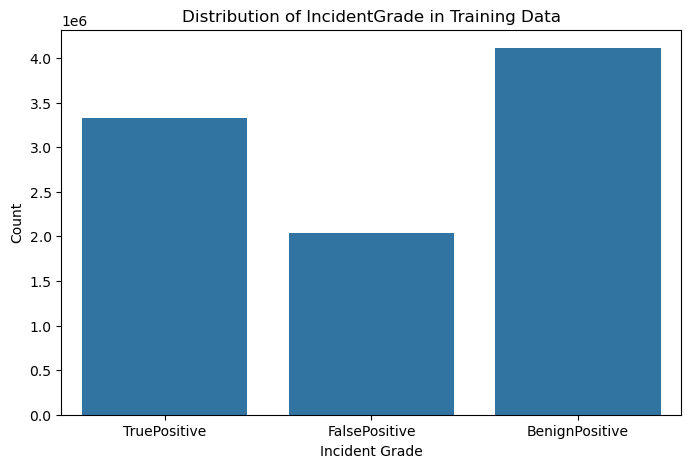

In [12]:
# Target Variable Distribution
# Adjust 'IncidentGrade' if your target column has a different name
plt.figure(figsize=(8, 5))
sns.countplot(x='IncidentGrade', data=train_data)
plt.title('Distribution of IncidentGrade in Training Data')
plt.xlabel('Incident Grade')
plt.ylabel('Count')
plt.show()


In [13]:
# Check for missing values
print("Missing values in training data:\n", train_data.isnull().sum())
print("Missing values in test data:\n", test_data.isnull().sum())

# Fill missing values: numerical columns with median, categorical columns with mode
for column in train_data.columns:
    if train_data[column].dtype == 'object':
        train_data[column].fillna(train_data[column].mode()[0], inplace=True)
        test_data[column].fillna(test_data[column].mode()[0], inplace=True)
    else:
        train_data[column].fillna(train_data[column].median(), inplace=True)
        test_data[column].fillna(test_data[column].median(), inplace=True)


Missing values in training data:
 Id                          0
OrgId                       0
IncidentId                  0
AlertId                     0
Timestamp                   0
DetectorId                  0
AlertTitle                  0
Category                    0
MitreTechniques       5468386
IncidentGrade           51340
ActionGrouped         9460773
ActionGranular        9460773
EntityType                  0
EvidenceRole                0
DeviceId                    0
Sha256                      0
IpAddress                   0
Url                         0
AccountSid                  0
AccountUpn                  0
AccountObjectId             0
AccountName                 0
DeviceName                  0
NetworkMessageId            0
EmailClusterId        9420025
RegistryKey                 0
RegistryValueName           0
RegistryValueData           0
ApplicationId               0
ApplicationName             0
OAuthApplicationId          0
ThreatFamily          9441956
FileNa

C:\Users\Ramanathan\AppData\Local\Temp\ipykernel_3708\1372486584.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_data[column].fillna(train_data[column].median(), inplace=True)
C:\Users\Ramanathan\AppData\Local\Temp\ipykernel_3708\1372486584.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values alwa

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9516837 entries, 0 to 9516836
Data columns (total 45 columns):
 #   Column              Dtype  
---  ------              -----  
 0   Id                  float64
 1   OrgId               float64
 2   IncidentId          float64
 3   AlertId             float64
 4   Timestamp           int32  
 5   DetectorId          float64
 6   AlertTitle          float64
 7   Category            int32  
 8   MitreTechniques     int32  
 9   IncidentGrade       int32  
 10  ActionGrouped       int32  
 11  ActionGranular      int32  
 12  EntityType          int32  
 13  EvidenceRole        int32  
 14  DeviceId            float64
 15  Sha256              float64
 16  IpAddress           float64
 17  Url                 float64
 18  AccountSid          float64
 19  AccountUpn          float64
 20  AccountObjectId     float64
 21  AccountName         float64
 22  DeviceName          float64
 23  NetworkMessageId    float64
 24  EmailClusterId      floa

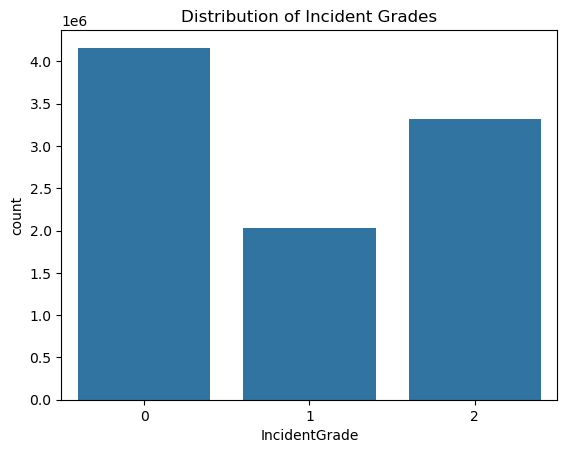

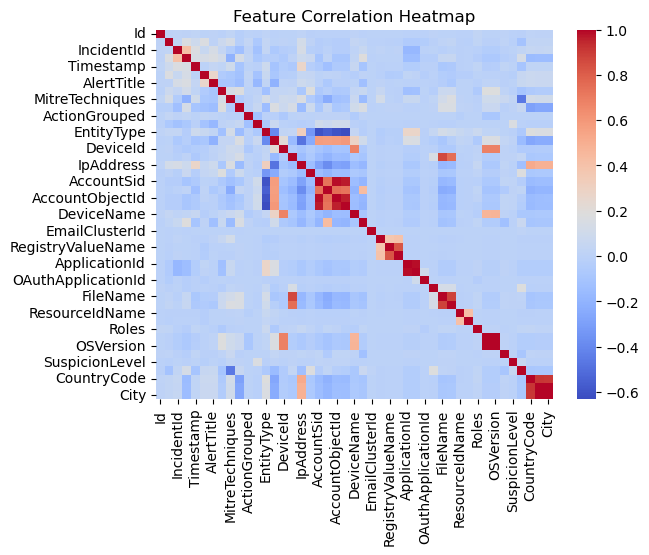

In [14]:
# Check for missing values and data types
print(train_df.info())
print(train_df.describe())

# Visualize the class distribution (TP, BP, FP)
sns.countplot(x='IncidentGrade', data=train_df)
plt.title('Distribution of Incident Grades')
plt.show()

# Check correlations between numerical features
corr_matrix = train_df.corr()
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()


In [15]:
# Handling missing values separately for numerical and categorical columns
# Fill missing values in numerical columns with the median
num_cols = test_df.select_dtypes(include=np.number).columns
test_df[num_cols] = test_df[num_cols].fillna(test_df[num_cols].median())

# Fill missing values in categorical columns with the mode (most frequent value)
cat_cols = test_df.select_dtypes(include='object').columns
test_df[cat_cols] = test_df[cat_cols].fillna(test_df[cat_cols].mode().iloc[0])

# Verify no missing values remain
print(test_df.isnull().sum())


Id                    0
OrgId                 0
IncidentId            0
AlertId               0
Timestamp             0
DetectorId            0
AlertTitle            0
Category              0
MitreTechniques       0
IncidentGrade         0
ActionGrouped         0
ActionGranular        0
EntityType            0
EvidenceRole          0
DeviceId              0
Sha256                0
IpAddress             0
Url                   0
AccountSid            0
AccountUpn            0
AccountObjectId       0
AccountName           0
DeviceName            0
NetworkMessageId      0
EmailClusterId        0
RegistryKey           0
RegistryValueName     0
RegistryValueData     0
ApplicationId         0
ApplicationName       0
OAuthApplicationId    0
ThreatFamily          0
FileName              0
FolderPath            0
ResourceIdName        0
ResourceType          0
Roles                 0
OSFamily              0
OSVersion             0
AntispamDirection     0
SuspicionLevel        0
LastVerdict     

In [16]:
# Example of time-based feature extraction from 'Timestamp'
if 'Timestamp' in train_df.columns:
    train_df['Hour'] = pd.to_datetime(train_df['Timestamp']).dt.hour
    test_df['Hour'] = pd.to_datetime(test_df['Timestamp']).dt.hour

    # Creating additional time-based features (optional)
    train_df['Day'] = pd.to_datetime(train_df['Timestamp']).dt.day
    test_df['Day'] = pd.to_datetime(test_df['Timestamp']).dt.day

    # Drop 'Timestamp' column after feature extraction
    train_df.drop('Timestamp', axis=1, inplace=True)
    test_df.drop('Timestamp', axis=1, inplace=True)

# Check if 'ID' column exists before dropping it
if 'ID' in train_df.columns:
    train_df.drop('ID', axis=1, inplace=True)
if 'ID' in test_df.columns:
    test_df.drop('ID', axis=1, inplace=True)

# Check updated data after feature engineering
print(train_df.head())



         Id     OrgId  IncidentId   AlertId  DetectorId  AlertTitle  Category  \
0 -1.334329 -0.469468   -0.579720 -0.616770   -0.238271   -0.256626        10   
1 -0.780419 -0.241947   -0.582086 -0.427806   -0.121057   -0.253397         7   
2  0.431260  1.622169   -0.101885  0.666231    0.717823   -0.231149        10   
3  0.881312 -0.231605   -0.311755  0.800775   -0.249762   -0.256975         1   
4 -1.265091 -0.086820   -0.548711 -0.475694   -0.233674   -0.250693         6   

   MitreTechniques  IncidentGrade  ActionGrouped  ...  OSFamily  OSVersion  \
0              705              2              0  ...  0.144225    0.14433   
1              705              1              0  ...  0.144225    0.14433   
2              864              1              0  ...  0.144225    0.14433   
3              705              0              0  ...  0.144225    0.14433   
4              705              2              0  ...  0.144225    0.14433   

   AntispamDirection  SuspicionLevel  LastVe

In [17]:
# 1. Split the data into features (X) and target (y)
X = train_df.drop('IncidentGrade', axis=1)  # Features (excluding the target)
y = train_df['IncidentGrade']               # Target variable (IncidentGrade)

# 2. Perform train-validation split (80% training, 20% validation)
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Check the shape of the train and validation sets
print(f"Training set shape: {X_train.shape}, Validation set shape: {X_val.shape}")

# Check the distribution of the target variable in the training and validation sets
print("Training target distribution:\n", y_train.value_counts(normalize=True))
print("Validation target distribution:\n", y_val.value_counts(normalize=True))


Training set shape: (7613469, 45), Validation set shape: (1903368, 45)
Training target distribution:
 IncidentGrade
0    0.437347
2    0.349140
1    0.213513
Name: proportion, dtype: float64
Validation target distribution:
 IncidentGrade
0    0.437347
2    0.349141
1    0.213513
Name: proportion, dtype: float64


In [18]:
# Redefining X and y in case previous cell was not run
X = train_df.drop('IncidentGrade', axis=1)  # Features (excluding the target)
y = train_df['IncidentGrade']               # Target variable (IncidentGrade)

# Re-splitting the data into training and validation sets (if needed)
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# 1. Import the RandomForestClassifier from sklearn
from sklearn.ensemble import RandomForestClassifier

# 2. Initialize the Random Forest model with class_weight set to 'balanced' to handle class imbalance
rf_model = RandomForestClassifier(random_state=42, class_weight='balanced')

# 3. Fit the model on the training data
rf_model.fit(X_train, y_train)

# 4. Predict on the validation set
y_pred_val = rf_model.predict(X_val)

# 5. Evaluate the performance of the model using macro-F1 score, precision, and recall
from sklearn.metrics import f1_score, precision_score, recall_score

macro_f1 = f1_score(y_val, y_pred_val, average='macro')
precision = precision_score(y_val, y_pred_val, average='macro')
recall = recall_score(y_val, y_pred_val, average='macro')

# 6. Print evaluation metrics
print(f"Macro F1 Score (Validation): {macro_f1:.4f}")
print(f"Precision (Validation): {precision:.4f}")
print(f"Recall (Validation): {recall:.4f}")


Macro F1 Score (Validation): 0.9776
Precision (Validation): 0.9791
Recall (Validation): 0.9761


In [19]:
print(test_df.columns)


Index(['Id', 'OrgId', 'IncidentId', 'AlertId', 'DetectorId', 'AlertTitle',
       'Category', 'MitreTechniques', 'IncidentGrade', 'ActionGrouped',
       'ActionGranular', 'EntityType', 'EvidenceRole', 'DeviceId', 'Sha256',
       'IpAddress', 'Url', 'AccountSid', 'AccountUpn', 'AccountObjectId',
       'AccountName', 'DeviceName', 'NetworkMessageId', 'EmailClusterId',
       'RegistryKey', 'RegistryValueName', 'RegistryValueData',
       'ApplicationId', 'ApplicationName', 'OAuthApplicationId',
       'ThreatFamily', 'FileName', 'FolderPath', 'ResourceIdName',
       'ResourceType', 'Roles', 'OSFamily', 'OSVersion', 'AntispamDirection',
       'SuspicionLevel', 'LastVerdict', 'CountryCode', 'State', 'City',
       'Usage', 'Hour', 'Day'],
      dtype='object')


In [29]:
print("Training Data Columns: ", train_df.columns)
print("Test Data Columns: ", test_df.columns)


Training Data Columns:  Index(['Id', 'OrgId', 'IncidentId', 'AlertId', 'Timestamp', 'DetectorId',
       'AlertTitle', 'Category', 'MitreTechniques', 'IncidentGrade',
       'ActionGrouped', 'ActionGranular', 'EntityType', 'EvidenceRole',
       'DeviceId', 'Sha256', 'IpAddress', 'Url', 'AccountSid', 'AccountUpn',
       'AccountObjectId', 'AccountName', 'DeviceName', 'NetworkMessageId',
       'EmailClusterId', 'RegistryKey', 'RegistryValueName',
       'RegistryValueData', 'ApplicationId', 'ApplicationName',
       'OAuthApplicationId', 'ThreatFamily', 'FileName', 'FolderPath',
       'ResourceIdName', 'ResourceType', 'Roles', 'OSFamily', 'OSVersion',
       'AntispamDirection', 'SuspicionLevel', 'LastVerdict', 'CountryCode',
       'State', 'City'],
      dtype='object')
Test Data Columns:  Index(['Id', 'OrgId', 'IncidentId', 'AlertId', 'Timestamp', 'DetectorId',
       'AlertTitle', 'Category', 'MitreTechniques', 'IncidentGrade',
       'ActionGrouped', 'ActionGranular', 'EntityTyp

In [30]:
target_column = 'Triage_Grade'  # Replace with the actual target column name


In [8]:
# Check the columns in the training and testing dataframes
print("Training DataFrame Columns:\n", train_df.columns)
print("\nTesting DataFrame Columns:\n", test_df.columns)

# Check for null values in the column
if 'Incident_Grade' in train_df.columns:
    print("Training 'Incident_Grade' has null values:\n", train_df['Incident_Grade'].isnull().sum())

if 'Incident_Grade' in test_df.columns:
    print("Testing 'Incident_Grade' has null values:\n", test_df['Incident_Grade'].isnull().sum())


Training DataFrame Columns:
 Index(['Id', 'OrgId', 'IncidentId', 'AlertId', 'Timestamp', 'DetectorId',
       'AlertTitle', 'Category', 'MitreTechniques', 'IncidentGrade',
       'ActionGrouped', 'ActionGranular', 'EntityType', 'EvidenceRole',
       'DeviceId', 'Sha256', 'IpAddress', 'Url', 'AccountSid', 'AccountUpn',
       'AccountObjectId', 'AccountName', 'DeviceName', 'NetworkMessageId',
       'EmailClusterId', 'RegistryKey', 'RegistryValueName',
       'RegistryValueData', 'ApplicationId', 'ApplicationName',
       'OAuthApplicationId', 'ThreatFamily', 'FileName', 'FolderPath',
       'ResourceIdName', 'ResourceType', 'Roles', 'OSFamily', 'OSVersion',
       'AntispamDirection', 'SuspicionLevel', 'LastVerdict', 'CountryCode',
       'State', 'City'],
      dtype='object')

Testing DataFrame Columns:
 Index(['Id', 'OrgId', 'IncidentId', 'AlertId', 'Timestamp', 'DetectorId',
       'AlertTitle', 'Category', 'MitreTechniques', 'IncidentGrade',
       'ActionGrouped', 'ActionGranula

In [9]:
# Rename the column if necessary (replace 'Possible_Incorrect_Name' with the actual column name)
train_df.rename(columns={'Possible_Incorrect_Name': 'Incident_Grade'}, inplace=True)
test_df.rename(columns={'Possible_Incorrect_Name': 'Incident_Grade'}, inplace=True)


In [13]:
# Check the column names in both datasets
print("Training DataFrame Columns:\n", train_df.columns)
print("Testing DataFrame Columns:\n", test_df.columns)


Training DataFrame Columns:
 Index(['Id', 'OrgId', 'IncidentId', 'AlertId', 'Timestamp', 'DetectorId',
       'AlertTitle', 'Category', 'MitreTechniques', 'IncidentGrade',
       'ActionGrouped', 'ActionGranular', 'EntityType', 'EvidenceRole',
       'DeviceId', 'Sha256', 'IpAddress', 'Url', 'AccountSid', 'AccountUpn',
       'AccountObjectId', 'AccountName', 'DeviceName', 'NetworkMessageId',
       'EmailClusterId', 'RegistryKey', 'RegistryValueName',
       'RegistryValueData', 'ApplicationId', 'ApplicationName',
       'OAuthApplicationId', 'ThreatFamily', 'FileName', 'FolderPath',
       'ResourceIdName', 'ResourceType', 'Roles', 'OSFamily', 'OSVersion',
       'AntispamDirection', 'SuspicionLevel', 'LastVerdict', 'CountryCode',
       'State', 'City'],
      dtype='object')
Testing DataFrame Columns:
 Index(['Id', 'OrgId', 'IncidentId', 'AlertId', 'Timestamp', 'DetectorId',
       'AlertTitle', 'Category', 'MitreTechniques', 'IncidentGrade',
       'ActionGrouped', 'ActionGranular

In [14]:
# Rename the column to 'Incident_Grade' if there is a small typo or mismatch
train_df.rename(columns={'Incident_Grade ': 'Incident_Grade'}, inplace=True)
test_df.rename(columns={'Incident_Grade ': 'Incident_Grade'}, inplace=True)


In [20]:
print(train_df.columns)


Index(['Id', 'OrgId', 'IncidentId', 'AlertId', 'Timestamp', 'DetectorId',
       'AlertTitle', 'Category', 'MitreTechniques', 'IncidentGrade',
       'ActionGrouped', 'ActionGranular', 'EntityType', 'EvidenceRole',
       'DeviceId', 'Sha256', 'IpAddress', 'Url', 'AccountSid', 'AccountUpn',
       'AccountObjectId', 'AccountName', 'DeviceName', 'NetworkMessageId',
       'EmailClusterId', 'RegistryKey', 'RegistryValueName',
       'RegistryValueData', 'ApplicationId', 'ApplicationName',
       'OAuthApplicationId', 'ThreatFamily', 'FileName', 'FolderPath',
       'ResourceIdName', 'ResourceType', 'Roles', 'OSFamily', 'OSVersion',
       'AntispamDirection', 'SuspicionLevel', 'LastVerdict', 'CountryCode',
       'State', 'City'],
      dtype='object')


In [23]:
if 'Incident_Grade' not in train_df.columns:
    raise ValueError("Target column 'Incident_Grade' does not exist in the training dataframe.")


ValueError: Target column 'Incident_Grade' does not exist in the training dataframe.